<a href="https://colab.research.google.com/github/ewattudo/vis1/blob/main/Admissions%20Pipeline%20and%20Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup and Upload Files
Run this for data and setup code. 

## Setup

In [441]:
#---------------------------SETUP----------------------------------
#get useful libraries
import time, os, sys, re #basics
import zipfile, json, datetime, string   #string for annotating points in scatter 
import numpy as np #basic math
from statistics import * #stats

!pip install squarify
import squarify 

!pip install adjustText 
from adjustText import adjust_text

import matplotlib.pyplot as plt #import pylab as plt #apparently discouraged now: 
 #https://stackoverflow.com/questions/11469336/what-is-the-difference-between-pylab-and-pyplot
 #https://www.tutorialspoint.com/matplotlib/matplotlib_pylab_module.htm

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
#s4 = Styler(df4, uuid_len=0, cell_ids=False)

import urllib  #weird, guess need to have os and pandas imported for this to work  %TODO/LATER ditch it, its weird anyway, just use wget/curl                                                 

from google.colab import files

#import webbrowser                                                                                                           

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

#many tricks how to extend notebook functionality
#https://coderzcolumn.com/tutorials/python/list-of-useful-magic-commands-in-jupyter-notebook-lab
#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#MAGICS and THEMES/STYLES: important! does affect not just shading/colors, but also fonts, spacing, etc
#(even if you only select default (v not selecting anything) [but does seem to work better if you do make explicit sleections]) 

###magics: https://ipython.readthedocs.io/en/stable/interactive/magics.html
#most essential setup for vis: it does affect vis! careful!! stick with inline, maybe notebook; others mostly for non-notebook, eg spyder environ
#https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html recomends *inline*!
#show current one:
#%matplotlib 
#%matplotlib --list 
#interactive plots:
#%matplotlib notebook  
#static images of your plot:
%matplotlib inline 
#may play with this one and other magics (btw default is probably agg)
#%matplotlib nbagg

###themes/styles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
#https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html
#https://matplotlib.org/stable/tutorials/introductory/customizing.html
#here more about art and style than under the hood functionality as with magics, explore and experiment
#many may find 'default' or seaborn ones more pleasing; my fav 'classic' is back from 90s ;) 
#plt.style.available #list available styles :) may install more
#plt.style.use('default') # more delicate subtle than classic
plt.style.use('seaborn-white')  #  'seaborn-whitegrid' 'seaborn-white' 'seaborn-poster'
# btw: magics v theme/style sequence matters, eg if i specify classic style before inline magic, i wouldnt get grey bounding box im getting

#wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image

!pip install leafmap
!pip install pycrs
!pip install osmnx

#Pywaffle
!pip install pywaffle
import matplotlib.pyplot as plt
from pywaffle import Waffle

#plotly
import plotly.express as px #a quick simple one
import plotly.graph_objects as go #can get convoluted

#ton of dependencies; also saying here which for what not to get lost
import leafmap
import pycrs #may be needed for some imported data such as shapefiles
import geopandas #may be needed to for some files such a kml
import osmnx #for geocoding, eg we geocode camden
! pip install geocoder                                                                                       
from geopy.geocoders import Nominatim 

import folium as f                                                                     
from folium.plugins import MarkerCluster, HeatMap 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Data Upload

### Camden Comparison

In [391]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/CompReports.csv", "comps")

('comps', <http.client.HTTPMessage at 0x7fcabce1ae90>)

In [392]:
os.getcwd() #pwd
os.listdir() #compare to clicking on the left the folder icon #dir

'/content'

['.config',
 'programs',
 'progmonth',
 'campcomps',
 'yoy',
 'AC',
 'fallapps',
 'pipe',
 'namel',
 'AppsTotal',
 'hist',
 'race',
 'geo',
 'comps',
 'sample_data']

In [393]:
comps=pd.read_csv('comps')

### Rutgers Comparison

In [394]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/CampCompReports.csv", "campcomps")

('campcomps', <http.client.HTTPMessage at 0x7fcac1cc2320>)

In [395]:
campcomps=pd.read_csv('campcomps')

### Program Pipeline

In [396]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/ProgramDetails.csv", "programs")

('programs', <http.client.HTTPMessage at 0x7fcabdcf9900>)

In [397]:
programs=pd.read_csv('programs')

### Year Over Year Data

In [398]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/YoYCompReports.csv", "yoy")

('yoy', <http.client.HTTPMessage at 0x7fcabdcf9cc0>)

In [399]:
yoy=pd.read_csv('yoy')

### Historical Data 

In [400]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/historical.csv", "hist")

('hist', <http.client.HTTPMessage at 0x7fcabdcfb310>)

In [401]:
hist=pd.read_csv('hist')

### Fall 2023 Application Data

In [402]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/Fall23AppData.csv", "fallapps")

('fallapps', <http.client.HTTPMessage at 0x7fcabdcf9510>)

In [403]:
fall=pd.read_csv('fallapps')

### Race Data 

In [404]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/race.csv", "race")

('race', <http.client.HTTPMessage at 0x7fcabdcfb760>)

In [405]:
race=pd.read_csv('race')

### Date Data 

In [406]:
#I removed the visualizations this supported, I plan to save this for later. 
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/progmonth.csv", "progmonth")

('progmonth', <http.client.HTTPMessage at 0x7fcabdcfb970>)

In [407]:
progmonth=pd.read_csv('progmonth')

### Name Data

In [408]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/Names.csv", "namel")

('namel', <http.client.HTTPMessage at 0x7fcabdcf8730>)

### AC Data for Treemap

In [409]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/Program%20AC.csv", "AC")

('AC', <http.client.HTTPMessage at 0x7fcabdcfb550>)

In [410]:
AC=pd.read_csv('AC')

In [411]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/Program%20Apps.csv", "AppsTotal")

('AppsTotal', <http.client.HTTPMessage at 0x7fcabdcf8a30>)

### App Data for Treemap

In [412]:
AppsTotal=pd.read_csv('AppsTotal')
AppsTotal.head(3)

index                                 Program  Total  \
0      1                                 Biology     71   
1      2  Biology: Computational and Integrative    143   
2      3                    Business and Science     26   

   Percent International Category  Mid  
0                   62.0     STEM   50  
1                   71.3     STEM   50  
2                   73.1     STEM   50

### Geographical Data for Map

In [413]:
#This data needs to be updated with new applications.
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/locations.csv", "geo")

('geo', <http.client.HTTPMessage at 0x7fcac5d85cf0>)

In [414]:
geo=pd.read_csv('geo')

In [415]:
geo.head(3)

City        Lat       Long  \
0     Abaam   6.217532  -0.831562   
1  Abeokuta   7.160800   3.348300   
2  Aberdeen  45.464900 -98.468600   

                                        Program        Status  
0                                Chemistry (MS)  Complete App  
1  Biology: Computational and Integrative (PHD)  Admit-Coming  
2                         Forensic Science (MS)  Admit-Coming

### Pipeline Data for Sankey

In [416]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/pipeline.csv", "pipe")

('pipe', <http.client.HTTPMessage at 0x7fcabdcfb640>)

In [417]:
pipe=pd.read_csv('pipe')

In [448]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/downpipe.csv", "downpipe")

('downpipe', <http.client.HTTPMessage at 0x7fcabe22a8f0>)

In [449]:
down=pd.read_csv('downpipe')
down.head(3)

Program           Status  Applications
0  Biology            Admit            11
1  Biology     Admit-Coming            23
2  Biology  Admit-Withdrawn             3

# GRADUATE ADMISSIONS PIPELINE

The desired outcomes of this visualization include: 

1.   Defining the Process
2.   Determining the health of the pipeline 
3.   Disaggregating the Data 

## VISUALIZING THE PIPELINE

In [428]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      thickness = 25,
      line = dict(color = "black", width = .5),
      label = pipe.label,
      color = "#cc0033"
    ),
    link = dict(
          
      # indices correspond to labels!!!
      source = pipe.source, 
      target = pipe.target,
      value  = pipe.value
  ))])
  
fig.show()

## PIPELINE COMPARISON


### COMPARISON AGAINST LAST FIVE YEARS

In [156]:
fig = px.line(hist, x="Year", y="Value", color='Status')
fig.show()

### COMPARISON AGAINST 2022: DOWN THE PIPE

In [425]:
#decided to ditch the bar graphs, I think this conveys what I want in a cleaner way. 
fig = go.Figure(go.Indicator(
    domain = {'x': [0, 1], 'y': [0, 1]},
    value = 1335,
    mode = "gauge+number+delta",
    title = {'text': "2023 SUBMITTED APPLICATIONS (SCARLET) <br> Point in Time (Grey) & 2022 Total (Black)"},
    delta = {'reference': 529},
    gauge = {'axis': {'range': [None, 1500]},
             'bar': {'color': "#cc0033"},
             'steps' : [
                 {'range': [0, 529], 'color': "gray"},
                 {'range': [529, 886], 'color': "black"}],
             'threshold' : {'line': {'color': "#cc0033", 'width': 10}, 'thickness': 0.75, 'value': 1500}}))

fig.show()

fig = go.Figure(go.Indicator(
    domain = {'x': [0, 1], 'y': [0, 1]},
    value = 597,
    mode = "gauge+number+delta",
    title = {'text': "2023 ADMITTED APPLICATIONS (SCARLET)<br> Point in Time (Grey) & 2022 Total (Black)"},
    delta = {'reference': 237},
    gauge = {'axis': {'range': [None, 800]},
             'bar': {'color': "#cc0033"},
             'steps' : [
                 {'range': [0, 237], 'color': "gray"},
                 {'range': [237, 455], 'color': "black"}],
             'threshold' : {'line': {'color': "#cc0033", 'width': 10}, 'thickness': .75, 'value': 800}}))

fig.show()

fig = go.Figure(go.Indicator(
    domain = {'x': [0, 1], 'y': [0, 1]},
    value = 293,
    mode = "gauge+number+delta",
    title = {'text': "2023 ADMIT COMING (AC) (Scarlet) <br> Point in Time (Grey) & 2022 Total (Black)"},
    delta = {'reference': 143},
    gauge = {'axis': {'range': [None, 400]},
             'bar': {'color': "#cc0033"},
             'steps' : [
                 {'range': [0, 143], 'color': "gray"},
                 {'range': [143, 239], 'color': "black"}],
             'threshold' : {'line': {'color': "#cc0033", 'width': 10}, 'thickness': 0.75, 'value': 375}}))

fig.show()

### COMPARISON AGAINST 2022: RUTGERS SCHOOLS

In [426]:
fig = px.scatter(comps, x="Percent Change of ACs Over 2022", y="Count of ACs",
                 symbol='Classification', color="Change in Count of ACs Over 2022",
                 size="Count of ACs", hover_data=['Category'],width=1500,height=600,
                 color_continuous_scale=px.colors.sequential.Turbo)
fig.update_layout(legend=dict(yanchor="top",xanchor="right"),
    title_text = 'Comparing Rutgers-Camden Admitted-Coming (AC) Students Across Variables with What-if Analysis') 

fig = px.scatter(campcomps, x="Percent Change of ACs Over 2022", y="Count of Acs",
                 symbol='Campus', color="Change in Count of Acs Over 2022",
                 size="Count of Acs", hover_data=['School'],width=1500,height=600,
                 color_continuous_scale=px.colors.sequential.Turbo)
fig.update_layout(legend=dict(yanchor="top",xanchor="right"),
    title_text = 'Comparing Rutgers Graduate Schools Admitted-Coming (AC) Students Across Variables with What-if Analysis') 

In [451]:
import plotly.express as px
fig = px.sunburst(down, path=['Program', 'Status'], values='Applications')
fig.show()
import plotly.express as px
fig = px.sunburst(down, path=['Status', 'Program'], values='Applications')
fig.show()

# Deeper Examination

In [ ]:
#This only seems to run successfully when I am at work. I guess my home wifi isn't fast enough.
m = leafmap.Map()
m.add_points_from_xy(geo, x="Long", y="Lat")
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [311]:
#Going to break this up into to figs, Applicants and AC and fix the organization a bit. 
fig = px.treemap(AppsTotal, path=[px.Constant("Submitted Apps"), 'Category', 'Program'], values='Total',
                  color='Percent International', hover_data=['Program'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(AppsTotal['Mid'], weights=AppsTotal['Total']))
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))

fig = px.treemap(AC, path=[px.Constant("Admit-Coming (AC)"), 'Category', 'Program'], values='Total',
                  color='Percent International', hover_data=['Program'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(AC['Mid'], weights=AC['Total']))
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))

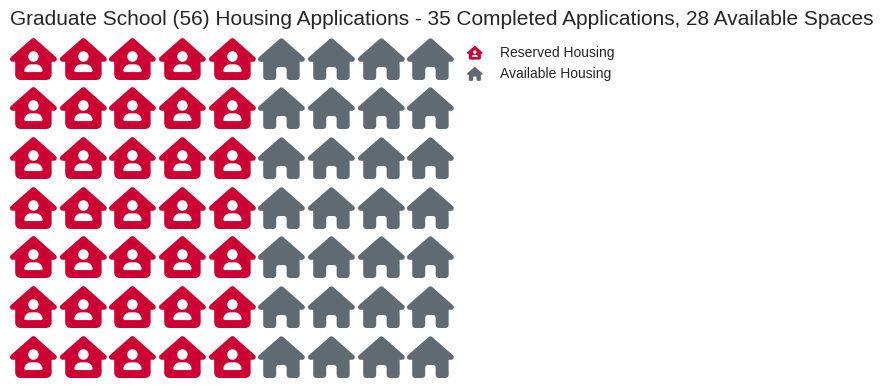

In [313]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=7,
    values=[35, 28],
    title={
        'label': 'Graduate School (56) Housing Applications - 35 Completed Applications, 28 Available Spaces',
        'loc': 'left',
        'fontdict': {
            'fontsize': 15
        }
    },
    colors=["#cc0033", "#5F6A72"],
    icons=['house-user', 'house'],
    font_size=30,
    icon_style='solid',
    icon_legend=True,
    legend={
        'labels': ['Reserved Housing', 'Available Housing'], 
        'loc': 'upper left', 
        'bbox_to_anchor': (1, 1)
    }
)

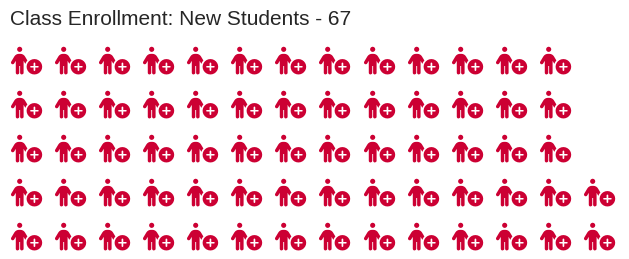

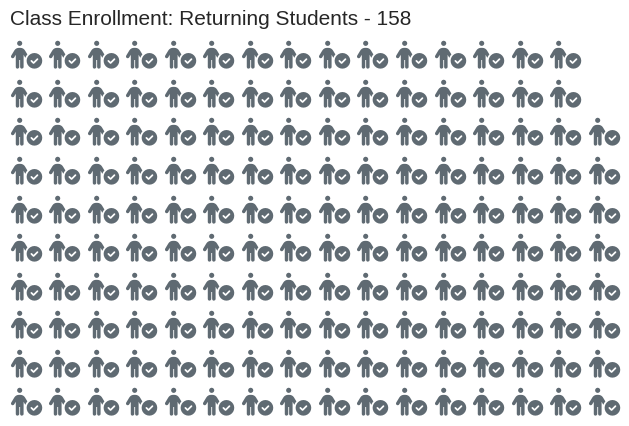

In [360]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=[67],
    title={
        'label': 'Class Enrollment: New Students - 67',
        'loc': 'left',
        'fontdict': {
            'fontsize': 15
        }
    },
    colors=["#cc0033"],
    icons=['person-circle-plus'],
    font_size=20,
    icon_style='solid',
)

fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    values=[158],
    title={
        'label': 'Class Enrollment: Returning Students - 158',
        'loc': 'left',
        'fontdict': {
            'fontsize': 15
        }
    },
    colors=["#5F6A72"],
    icons=['person-circle-check'],
    font_size=20,
    icon_style='solid',
)